In [1]:
import pandas as pd
from sh import find

In [2]:
from os.path import dirname, basename
import numpy as np

def read_value(line):
    return float(line.rstrip('\n').split(' ')[1].strip('"')) if line else np.nan
    
def read_median(file_name):
    task_name = basename(dirname(dirname(file_name)))
    series, platform = task_name.split('_')
    sample = basename(file_name)
    with open(file_name) as f:
        f.readline()
        median = read_value(f.readline())
        IQR = read_value(f.readline())
        p95 = read_value(f.readline())
        p99 = read_value(f.readline())
#        if not line:
#            median = np.nan
#        else:
#            median = float(line.rstrip('\n').split(' ')[1].strip('"'))
    return dict(series=series, 
                sample=sample,
                platform=platform, 
                median=median,
                IQR=IQR,
                p95=p95,
                p99=p99)

In [3]:
l = [f.rstrip('\n') for f in find('../data/preproc/data', '-name', '*.gnuse')]

In [4]:
medians = pd.DataFrame([read_median(x) for x in l])

In [5]:
medians.to_pickle('../data/preproc/gnuse-medians.py3.pickle')

In [6]:
import seaborn
%matplotlib inline

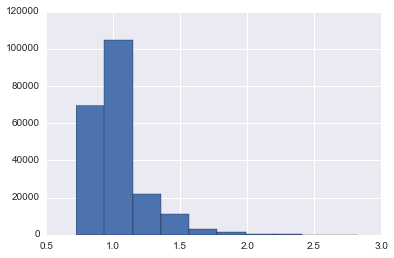

In [7]:
medians['median'].hist()

In [8]:
medians = medians.assign(bad_median=medians['median'] > 1.25)

In [13]:
(
    medians
    .query("bad_median and platform in ['GPL570', 'GPL571', 'GPL96']")
    [['sample', 'series', 'platform']]#.to_csv('/Users/nikita/mnt/hpc.mipt.ru/bad_samples.csv', index=False)
)

,sample,series,platform
66,GSM252822.gnuse,GSE10006,GPL570
68,GSM252824.gnuse,GSE10006,GPL570
70,GSM252826.gnuse,GSE10006,GPL570
193,GSM253283.gnuse,GSE10024,GPL96
264,GSM253664.gnuse,GSE10041,GPL570
266,GSM253666.gnuse,GSE10041,GPL570
267,GSM253667.gnuse,GSE10041,GPL570
268,GSM253668.gnuse,GSE10041,GPL570
269,GSM253669.gnuse,GSE10041,GPL570
275,GSM253675.gnuse,GSE10041,GPL570


In [ ]:
bad = medians.query("platform == 'GPL570'")[['sample', 'series', 'bad_median']].groupby('series').bad_median.mean()
bad[:5]

In [ ]:
bad[bad > 0].hist()

In [ ]:
bad[bad==1].shape, bad[bad > 0].shape, bad.shape

In [ ]:
(
    medians[['platform', 'series']]
    .drop_duplicates()
    .set_index('series')
    .join(pd.DataFrame(bad[bad==1]), how='inner')
    .query("platform in ['GPL570', 'GPL96', 'GPL571']")
    .reset_index()
    .assign(task=lambda d: d['series'].combine(d['platform'], func='{}_{}'.format))
    [['task']].to_csv('/Users/nikita/mnt/hpc.mipt.ru/bad-median-series.570.571.96.csv', index=False, header=None)
)

In [ ]:
bad[(bad >0) & (bad < 1)][:5]

In [ ]:
pd.read_table('/Users/nikita/mnt/hpc.mipt.ru/geo-datasets/GSE10006_GPL570_convert/out/GSE10006_GPL570_convert.txt', sep=' ')